<a href="https://colab.research.google.com/github/raj166/Deep-Learning-Basic-Projects/blob/main/CNN%20example%20with%20pooling%20and%20without%20pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Data Reshape

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [8]:
X_train_full.shape

(60000, 28, 28, 1)

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the model architecture

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

# Architecture 

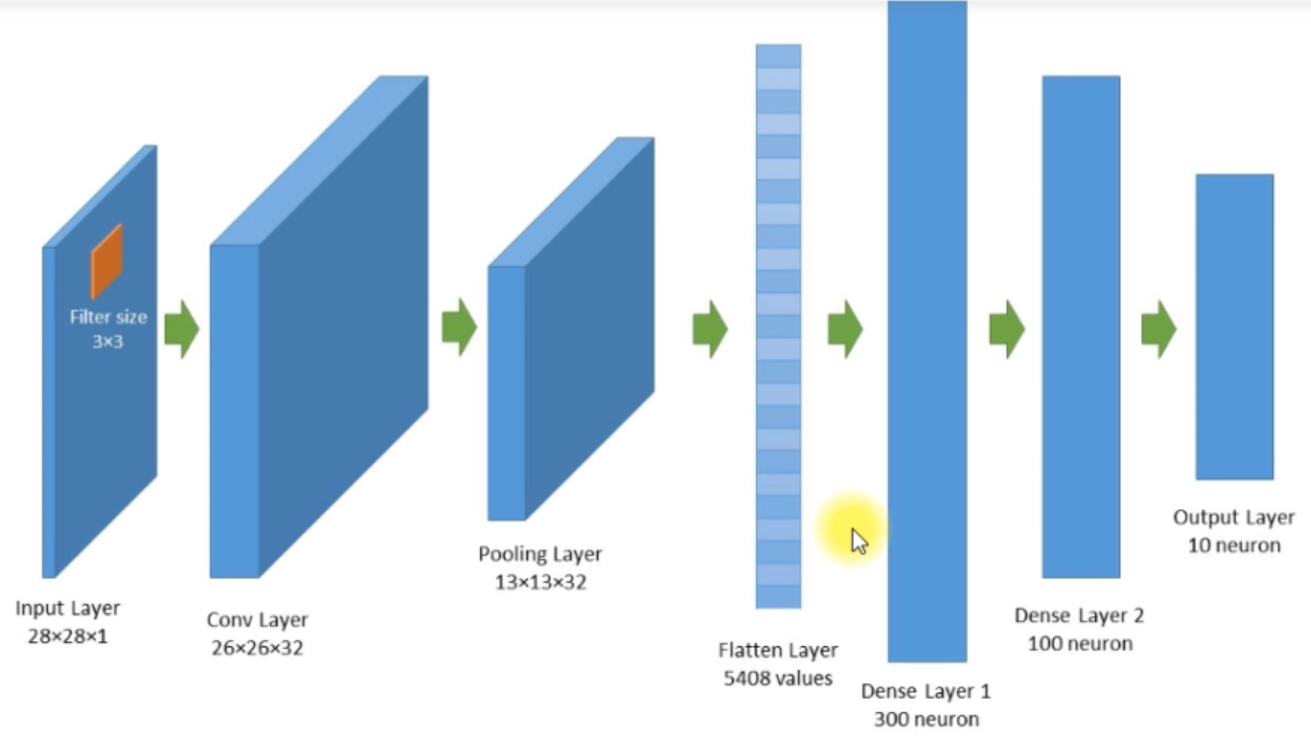

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
model_history = model.fit(X_train, y_train, epochs=30,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 34s 38ms/step - loss: 0.8766 - accuracy: 0.6988 - val_loss: 0.7540 - val_accuracy: 0.7332
Epoch 2/30
860/860 [==============================] - 33s 38ms/step - loss: 0.5386 - accuracy: 0.8046 - val_loss: 0.4903 - val_accuracy: 0.8212
Epoch 3/30
860/860 [==============================] - 33s 38ms/step - loss: 0.4810 - accuracy: 0.8261 - val_loss: 0.9134 - val_accuracy: 0.7126
Epoch 4/30
860/860 [==============================] - 33s 38ms/step - loss: 0.4440 - accuracy: 0.8413 - val_loss: 0.4157 - val_accuracy: 0.8566
Epoch 5/30
860/860 [==============================] - 33s 38ms/step - loss: 0.4201 - accuracy: 0.8500 - val_loss: 0.4358 - val_accuracy: 0.8478
Epoch 6/30
860/860 [==============================] - 33s 38ms/step - loss: 0.3956 - accuracy: 0.8582 - val_loss: 0.3753 - val_accuracy: 0.8712
Epoch 7/30
860/860 [==============================] - 33s 38ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 0.4065 - val_accuracy:

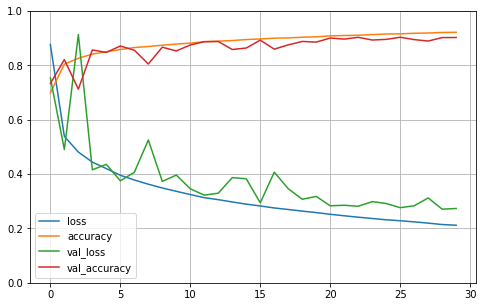

In [17]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2825 - accuracy: 0.8987


In [19]:
ev

[0.2825251519680023, 0.8986999988555908]

In [20]:
X_new = X_test[:3]

In [21]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [22]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


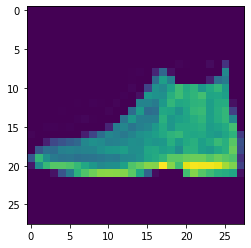

In [23]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [24]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [25]:
del model

### Architecture - Pooling vs No Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [26]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [27]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [28]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))


Epoch 1/3
860/860 [==============================] - 33s 38ms/step - loss: 0.8468 - accuracy: 0.7083 - val_loss: 0.8137 - val_accuracy: 0.7014
Epoch 2/3
 57/860 [>.............................] - ETA: 30s - loss: 0.6048 - accuracy: 0.7845

In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))